# **Example-dependent cost-sensitive regression**

**This is the list of our group members:**

1. Vadapalli Sai Sravan (CS24MTECH02007)
2. Supreet Shukla (CS24MTECH02004)
3. Tarun Jangir (CS24MTECH02005)
4. Taufique Ramzan Shaikh (CS24MTECH02006)
5. Afzaal Ahmad (CS24MTECH02002)

# **Import necessary libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the dataset**

In [2]:
data = pd.read_csv('costsensitiveregression.csv')

# Separate features and target variable
X = data.iloc[:, 0:11]  # Columns A to K
y = data.iloc[:, 11]    # Column L

# Extract false negative costs
fn_costs = data.iloc[:, 12]  # Column M

# Bahnsen's approach

In [3]:
def bahnsen_cost_sensitive_lr(X, y, fn_costs, fp_cost=6, tp_cost=6, tn_cost=0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test, fn_costs_train, fn_costs_test = train_test_split(
        X, y, fn_costs, test_size=0.2, random_state=42
    )

    # Create a logistic regression model
    lr = LogisticRegression()

    # Fit the model with the training data, using false negative costs as sample weights
    lr.fit(X_train, y_train, sample_weight=fn_costs_train)

    # Make predictions on the testing set
    y_pred = lr.predict(X_test)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]

    # Calculate the total cost
    total_cost = sum(fp_cost * (y_test == 0) * (y_pred == 1)) + sum(fn_costs_test * (y_test == 1) * (y_pred == 0)) + sum(tp_cost * (y_test == 1) * (y_pred == 1)) + sum(tn_cost * (y_test == 0) * (y_pred == 0))

    return y_test, y_pred, y_pred_proba, total_cost

# Nikou Gunnemann's approach (Variant D)


In [4]:
def nikou_gunnemann_cost_sensitive_lr(X, y, fn_costs, fp_cost=6, tp_cost=6, tn_cost=0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Split the false negative costs into training and testing sets
    _, fn_costs_test = train_test_split(
        fn_costs, test_size=0.2, random_state=42
    )

    # Create a logistic regression model
    lr = LogisticRegression()

    # Fit the model with the training data
    lr.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate the total cost
    fp_mask = (y_test == 0) & (y_pred == 1)
    fn_mask = (y_test == 1) & (y_pred == 0)
    tp_mask = (y_test == 1) & (y_pred == 1)
    tn_mask = (y_test == 0) & (y_pred == 0)
    total_cost = fp_cost * fp_mask.sum() + (fn_costs_test * fn_mask).sum() + tp_cost * tp_mask.sum() + tn_cost * tn_mask.sum()

    return y_test, y_pred, y_pred_proba, total_cost

# **Run Bahnsen's approach and  Nikou Gunnemann's approach**

In [5]:
# Run Bahnsen's approach
bahnsen_y_test, bahnsen_y_pred, bahnsen_y_pred_proba, bahnsen_cost = bahnsen_cost_sensitive_lr(X, y, fn_costs)
print(f"\nTotal Cost (Bahnsen's Approach): {bahnsen_cost}")

# Run Nikou Gunnemann's approach
nikou_gunnemann_y_test, nikou_gunnemann_y_pred, nikou_gunnemann_y_pred_proba, nikou_gunnemann_cost = nikou_gunnemann_cost_sensitive_lr(X, y, fn_costs)
print(f"\nTotal Cost (Nikou Gunnemann's Approach): {nikou_gunnemann_cost}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Total Cost (Bahnsen's Approach): 962455.0298730001

Total Cost (Nikou Gunnemann's Approach): 1279555.697946


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Plot confusion matrix for Bahnsen's approach and Nikou Gunnemann's approach**

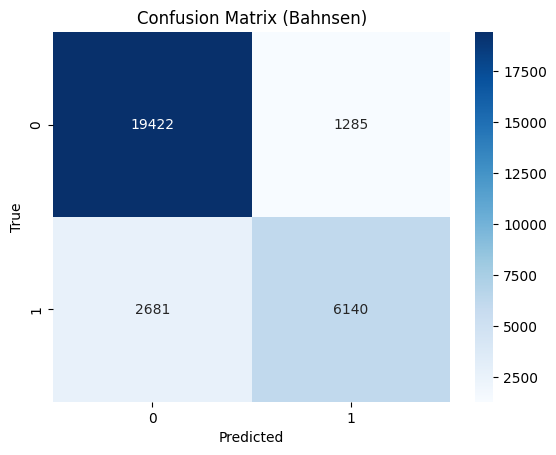

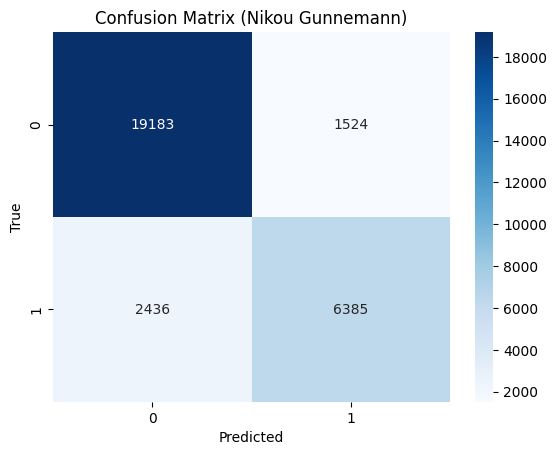

In [6]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Bahnsen's approach
plot_confusion_matrix(bahnsen_y_test, bahnsen_y_pred, 'Confusion Matrix (Bahnsen)')

# Plot confusion matrix for Nikou Gunnemann's approach
plot_confusion_matrix(nikou_gunnemann_y_test, nikou_gunnemann_y_pred, 'Confusion Matrix (Nikou Gunnemann)')

# **Print classification reports**

In [7]:
print("\nClassification Report (Bahnsen's Approach):")
print(classification_report(bahnsen_y_test, bahnsen_y_pred))

print("\nClassification Report (Nikou Gunnemann's Approach):")
print(classification_report(nikou_gunnemann_y_test, nikou_gunnemann_y_pred))


Classification Report (Bahnsen's Approach):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20707
           1       0.83      0.70      0.76      8821

    accuracy                           0.87     29528
   macro avg       0.85      0.82      0.83     29528
weighted avg       0.86      0.87      0.86     29528


Classification Report (Nikou Gunnemann's Approach):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     20707
           1       0.81      0.72      0.76      8821

    accuracy                           0.87     29528
   macro avg       0.85      0.83      0.83     29528
weighted avg       0.86      0.87      0.86     29528



# **Standard logistic regression**

In [8]:
def standard_logistic_regression(X, y, fn_costs, fp_cost=65, tp_cost=65, tn_cost=0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Split the false negative costs into training and testing sets
    _, fn_costs_test = train_test_split(
        fn_costs, test_size=0.2, random_state=42
    )

    # Create a logistic regression model
    lr = LogisticRegression()

    # Fit the model with the training data
    lr.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = lr.predict(X_test)

    # Calculate the total cost
    total_cost = sum(fp_cost * (y_test == 0) * (y_pred == 1)) + sum(fn_costs_test * (y_test == 1) * (y_pred == 0)) + sum(tp_cost * (y_test == 1) * (y_pred == 1)) + sum(tn_cost * (y_test == 0) * (y_pred == 0))

    return total_cost

# Run standard logistic regression
standard_lr_cost = standard_logistic_regression(X, y, fn_costs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Plots cost comparison bar chart**

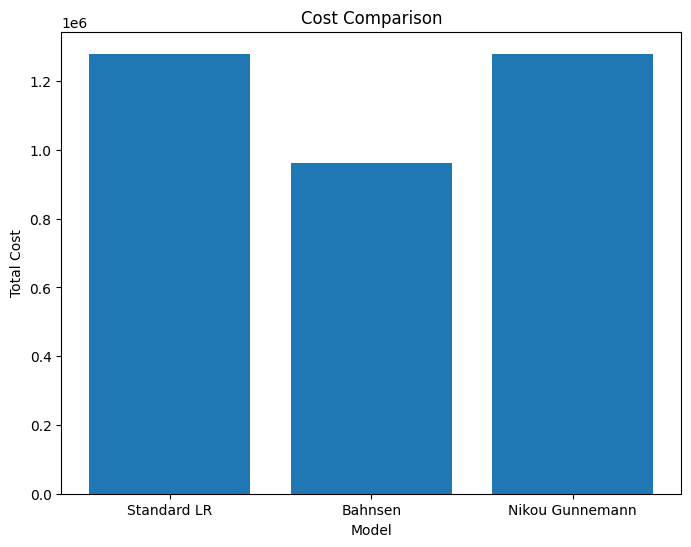

In [9]:
# Plot cost comparison bar chart
models = ['Standard LR', 'Bahnsen', 'Nikou Gunnemann']
costs = [standard_lr_cost, bahnsen_cost, nikou_gunnemann_cost]

plt.figure(figsize=(8, 6))
plt.bar(models, costs)
plt.xlabel('Model')
plt.ylabel('Total Cost')
plt.title('Cost Comparison')
plt.show()

# **Plot ROC curve**

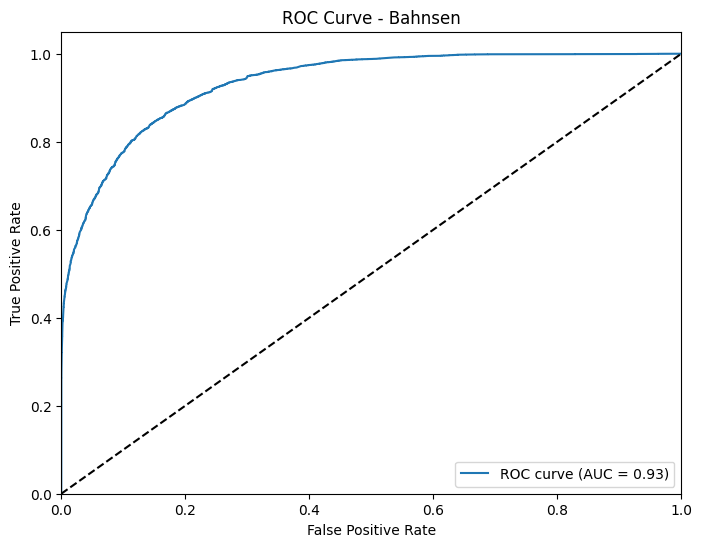

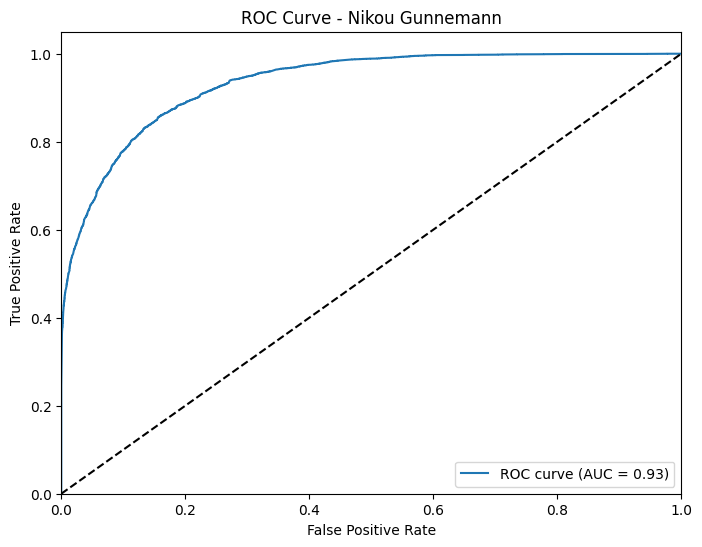

In [10]:
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for Bahnsen's approach
plot_roc_curve(bahnsen_y_test, bahnsen_y_pred_proba, 'Bahnsen')

# Plot ROC curve for Nikou Gunnemann's approach
plot_roc_curve(nikou_gunnemann_y_test, nikou_gunnemann_y_pred_proba, 'Nikou Gunnemann')